In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras.callbacks import EarlyStopping


# Questao 1

### LETRA A

In [2]:
# Criando um conjunto de pontos em um intervalo de 1 a 10 e treinando uma rede neural para prever esses pontos
X = np.linspace(1,10,1000)
Y = np.exp(-X)

RANDOM_STATE = 2
BATCH_SIZE = 32

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

# transformando os vetores em matrizes
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (640, 1)
Y_train: (640,)
X_val: (160, 1)
Y_val: (160,)


In [3]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

21.0

In [4]:
# criando a rede
model = Sequential()
model.add(Dense(21, input_dim=1, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #camada de saída
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#mean_squared_error
optmizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy']) #mean squared error é usada para problemas de regressão. binary_crossentropy é usada para problemas de classificação.

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=BATCH_SIZE, validation_data=(X_val, Y_val), verbose=1, callbacks=[es])

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0058
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0052 - val_accuracy: 0.0000e+00 - val_loss: 0.0038
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.0031
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0022 - val_accuracy: 0.0000e+00 - val_loss: 0.0030
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0021 - val_accuracy: 0.0000e+00 - val_loss: 0.0025
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0021 - val_accuracy: 0.0000e+00 - val_loss: 0.0023
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0018 - val_accuracy: 0.0000e+00 - val_loss: 0.0022
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

### Curva de Erro Médio

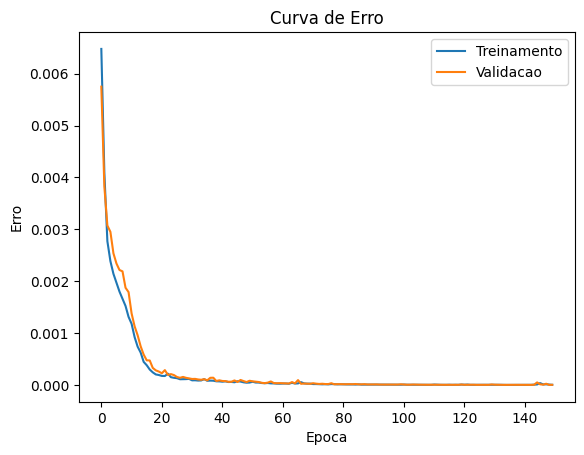

In [6]:
# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


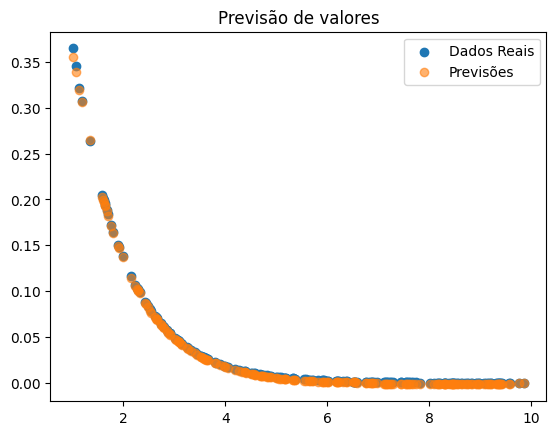

In [7]:
# Previsões
y_pred = model.predict(X_test)

# Visualizando os resultados
plt.title('Previsão de valores')
plt.scatter(X_test, Y_test, label='Dados Reais')
plt.scatter(X_test, y_pred, label='Previsões', alpha=0.6)
plt.legend()
plt.show()

### LETRA B

In [8]:
# Criando um conjunto de pontos em um intervalo de 1 a 10 e treinando uma rede neural para prever esses pontos
X = np.linspace(1,10,1000)
# logaritmo de x na base 10
Y = np.log10(X)

RANDOM_STATE = 2
BATCH_SIZE = 32

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

# transformando os vetores em matrizes
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (640, 1)
Y_train: (640,)
X_val: (160, 1)
Y_val: (160,)


In [9]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

21.0

In [10]:
# criando a rede
model = Sequential()
model.add(Dense(21, input_dim=1, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #camada de saída
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#mean_squared_error
optmizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy']) #mean squared error é usada para problemas de regressão. binary_crossentropy é usada para problemas de classificação.

In [11]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=BATCH_SIZE, validation_data=(X_val, Y_val), verbose=1, callbacks=[es])

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0014 - loss: 0.4518 - val_accuracy: 0.0000e+00 - val_loss: 0.2283
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 7.1747e-04 - loss: 0.1543 - val_accuracy: 0.0000e+00 - val_loss: 0.0046
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0016 - loss: 0.0084 - val_accuracy: 0.0000e+00 - val_loss: 0.0051
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0037 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0045 - loss: 0.0040 - val_accuracy: 0.0000e+00 - val_loss: 0.0040
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0013 - loss: 0.0040 - val_accuracy: 0.0000e+00 - val_loss: 0.0036
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0020 - loss: 0.0034 - val_accuracy: 0.0000e+00 - val_loss: 0.0033
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 6.3915e-04 - lo

### Curva de Erro Médio

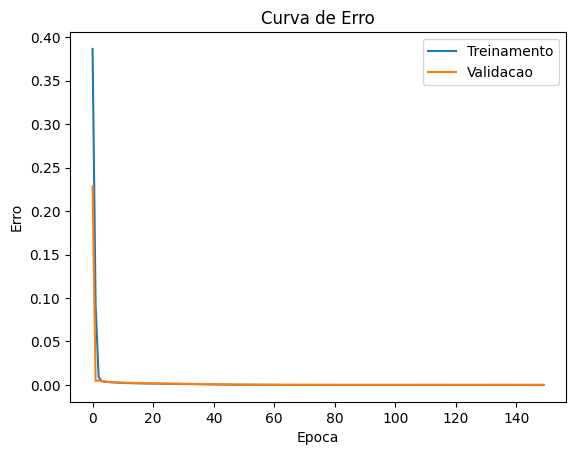

In [12]:
# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


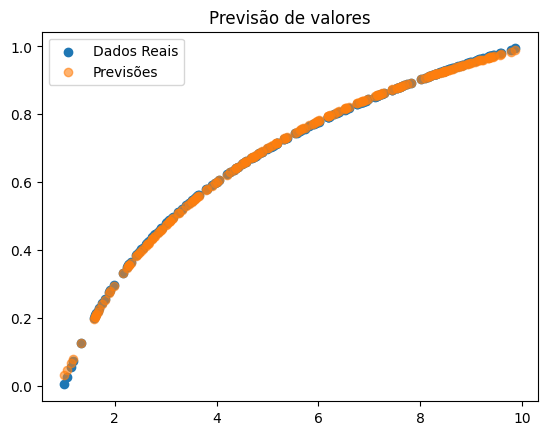

In [13]:
# Previsões
y_pred = model.predict(X_test)

# Visualizando os resultados
plt.title('Previsão de valores')
plt.scatter(X_test, Y_test, label='Dados Reais')
plt.scatter(X_test, y_pred, label='Previsões', alpha=0.6)
plt.legend()
plt.show()

### LETRA C

In [14]:
# Criando um conjunto de pontos em um intervalo de 0 a 5 e treinando uma rede neural para prever esses pontos
X = np.linspace(0,5,1000)
# logaritmo de x na base 10
Y = 10*X**5 + 5*X**4 + 2*X**3 - 0.5*X**2 + 3*X + 2

RANDOM_STATE = 2
BATCH_SIZE = 32

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

# transformando os vetores em matrizes
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (640, 1)
Y_train: (640,)
X_val: (160, 1)
Y_val: (160,)


In [15]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

21.0

In [16]:
# criando a rede
model = Sequential()
model.add(Dense(21, input_dim=1, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(21, kernel_initializer='normal' ,activation='selu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #camada de saída
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#mean_squared_error
optmizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy']) #mean squared error é usada para problemas de regressão. binary_crossentropy é usada para problemas de classificação.

In [17]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=BATCH_SIZE, validation_data=(X_val, Y_val), verbose=1, callbacks=[es])

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: 113317000.0000 - val_accuracy: 0.0000e+00 - val_loss: 135321904.0000
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 112030392.0000 - val_accuracy: 0.0000e+00 - val_loss: 135304160.0000
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 120778904.0000 - val_accuracy: 0.0000e+00 - val_loss: 135237488.0000
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 106654768.0000 - val_accuracy: 0.0000e+00 - val_loss: 135028032.0000
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 113618256.0000 - val_accuracy: 0.0000e+00 - val_loss: 134363280.0000
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 104447016.0000 - val_accuracy: 0.0000e+00 - val_loss: 132448488.0000
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 90222144.00

### Curva de Erro Médio

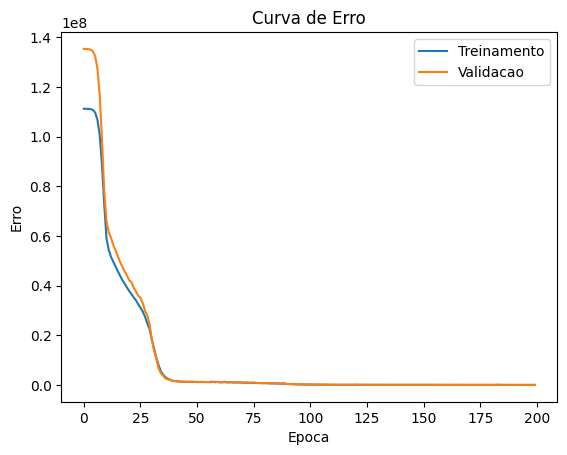

In [18]:
# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


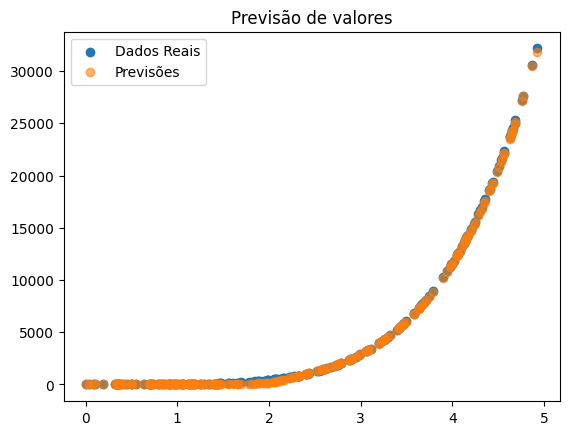

In [19]:
# Previsões
y_pred = model.predict(X_test)

# Visualizando os resultados
plt.title('Previsão de valores')
plt.scatter(X_test, Y_test, label='Dados Reais')
plt.scatter(X_test, y_pred, label='Previsões', alpha=0.6)
plt.legend()
plt.show()